In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

In [2]:
# Load historical stock prices (e.g., Apple)
df = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
data = df["Close"]


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


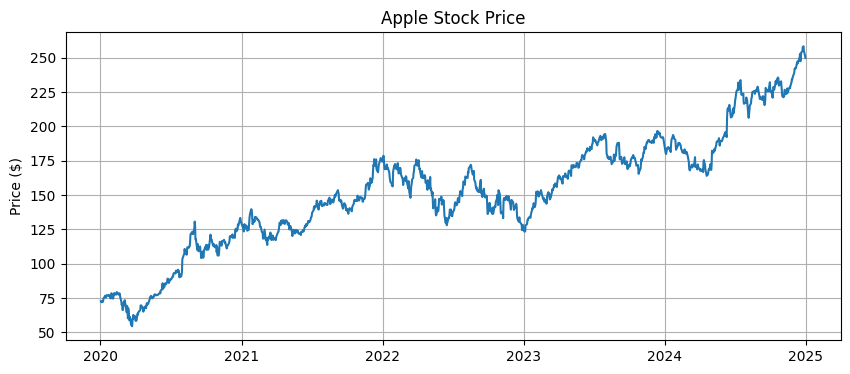

In [3]:
# Plot raw data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("Apple Stock Price")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


In [4]:
# Fit ARIMA model (p=5, d=1, q=2)
model = ARIMA(data, order=(5, 1, 2))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


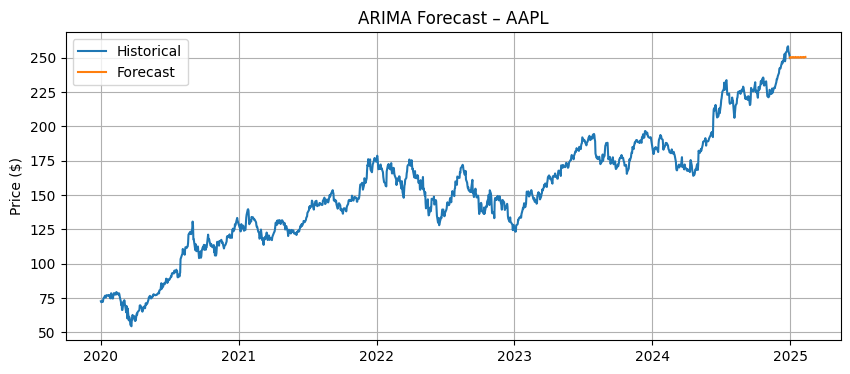

In [6]:
# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(data, label="Historical")
plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), forecast, label="Forecast")
plt.title("ARIMA Forecast – AAPL")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()